### Bike Sharing Demand Analysis



Bike sharing systems are new generation of traditional bike rentals where whole process from membership, rental and return back has become automatic. Through these systems, user is able to easily rent a bike from a particular position and return back at another position. Currently, there are about over 500 bike-sharing programs around the world which is composed of over 500 thousands bicycles. Today, there exists great interest in these systems due to their important role in traffic, environmental and health issues.
Apart from interesting real world applications of bike sharing systems, the characteristics of data being generated by these systems make them attractive for the research. Opposed to other transport services such as bus or subway, the duration of travel, departure and arrival position is explicitly recorded in these systems. This feature turns bike sharing system into a virtual sensor network that can be used for sensing mobility in the city. Hence, it is expected that most of important events in the city could be detected via monitoring these data.

In [6]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [7]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.linear_model import HuberRegressor, LinearRegression

DATA
1.   Season : season (1:winter, 2:spring, 3:summer, 4:fall)
2.  Weather :
*   1: Clear, Few clouds, Partly cloudy, Partly cloudy
*   2: Mist + Cloudy, Mist + Broken clouds, Mist + Few clouds, Mist
*3: Light Snow, Light Rain + Thunderstorm + Scattered clouds, Light Rain + Scattered clouds
*4: Heavy Rain + Ice Pallets + Thunderstorm + Mist, Snow + Fog


In [8]:
df=pd.read_csv("hours.csv")
df

,instant,dteday,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
0,8646,01-01-2012,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,8647,01-01-2012,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,8648,01-01-2012,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,8649,01-01-2012,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,8650,01-01-2012,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,17375,31-12-2012,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,17376,31-12-2012,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,17377,31-12-2012,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,17378,31-12-2012,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [9]:
#Filtering the dataframe with only yr=1 values
df=df[df['yr']!=0]

In [10]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 17 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   instant     8734 non-null   int64  
 1   dteday      8734 non-null   object 
 2   season      8734 non-null   int64  
 3   yr          8734 non-null   int64  
 4   mnth        8734 non-null   int64  
 5   hr          8734 non-null   int64  
 6   holiday     8734 non-null   int64  
 7   weekday     8734 non-null   int64  
 8   workingday  8734 non-null   int64  
 9   weathersit  8734 non-null   int64  
 10  temp        8734 non-null   float64
 11  atemp       8734 non-null   float64
 12  hum         8734 non-null   float64
 13  windspeed   8734 non-null   float64
 14  casual      8734 non-null   int64  
 15  registered  8734 non-null   int64  
 16  cnt         8734 non-null   int64  
dtypes: float64(4), int64(12), object(1)
memory usage: 1.2+ MB


In [11]:
df.describe()

,instant,season,yr,mnth,hr,holiday,weekday,workingday,weathersit,temp,atemp,hum,windspeed,casual,registered,cnt
count,8734.000000,8734.000000,8734.0,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000,8734.000000
mean,13012.500000,2.489810,1.0,6.501946,11.520151,0.029883,2.994733,0.681704,1.413098,0.504825,0.482481,0.611193,0.189034,42.679757,191.986604,234.666361
std,2521.432959,1.108279,0.0,3.449086,6.921208,0.170275,2.005254,0.465842,0.624470,0.186752,0.166587,0.188184,0.121490,56.970413,175.481637,208.910941
min,8646.000000,1.000000,1.0,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.020000,0.015200,0.160000,0.000000,0.000000,0.000000,1.000000
25%,10829.250000,2.000000,1.0,4.000000,6.000000,0.000000,1.000000,0.000000,1.000000,0.340000,0.333300,0.460000,0.104500,5.000000,46.000000,53.000000
50%,13012.500000,2.000000,1.0,7.000000,12.000000,0.000000,3.000000,1.000000,1.000000,0.520000,0.484800,0.610000,0.164200,20.000000,156.000000,191.000000
75%,15195.750000,3.000000,1.0,9.000000,18.000000,0.000000,5.000000,1.000000,2.000000,0.660000,0.621200,0.770000,0.253700,60.000000,275.000000,347.000000
max,17379.000000,4.000000,1.0,12.000000,23.000000,1.000000,6.000000,1.000000,4.000000,1.000000,0.924200,1.000000,0.806000,367.000000,886.000000,977.000000


In [12]:
df = df.drop(columns=['instant','dteday'])

In [13]:
df.rename(columns = {'dteday':'Date','yr':'year','mnth':'month','hr':'hours','weathersit':'weather','cnt':'total_cnt'}, inplace = True)

In [14]:
df

,season,year,month,hours,holiday,weekday,workingday,weather,temp,atemp,hum,windspeed,casual,registered,total_cnt
0,1,1,1,0,0,0,0,1,0.36,0.3788,0.66,0.0000,5,43,48
1,1,1,1,1,0,0,0,1,0.36,0.3485,0.66,0.1343,15,78,93
2,1,1,1,2,0,0,0,1,0.32,0.3485,0.76,0.0000,16,59,75
3,1,1,1,3,0,0,0,1,0.30,0.3333,0.81,0.0000,11,41,52
4,1,1,1,4,0,0,0,1,0.28,0.3030,0.81,0.0896,0,8,8
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,1,1,12,19,0,1,1,2,0.26,0.2576,0.60,0.1642,11,108,119
8730,1,1,12,20,0,1,1,2,0.26,0.2576,0.60,0.1642,8,81,89
8731,1,1,12,21,0,1,1,1,0.26,0.2576,0.60,0.1642,7,83,90
8732,1,1,12,22,0,1,1,1,0.26,0.2727,0.56,0.1343,13,48,61


In [15]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 8734 entries, 0 to 8733
Data columns (total 15 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   season      8734 non-null   int64  
 1   year        8734 non-null   int64  
 2   month       8734 non-null   int64  
 3   hours       8734 non-null   int64  
 4   holiday     8734 non-null   int64  
 5   weekday     8734 non-null   int64  
 6   workingday  8734 non-null   int64  
 7   weather     8734 non-null   int64  
 8   temp        8734 non-null   float64
 9   atemp       8734 non-null   float64
 10  hum         8734 non-null   float64
 11  windspeed   8734 non-null   float64
 12  casual      8734 non-null   int64  
 13  registered  8734 non-null   int64  
 14  total_cnt   8734 non-null   int64  
dtypes: float64(4), int64(11)
memory usage: 1.1 MB


In [16]:
cols=['season','month','hours','holiday','weekday','workingday','weather']

for col in cols:
  df[col]=df[col].astype('category')

 **Exploratory Data Analysis**

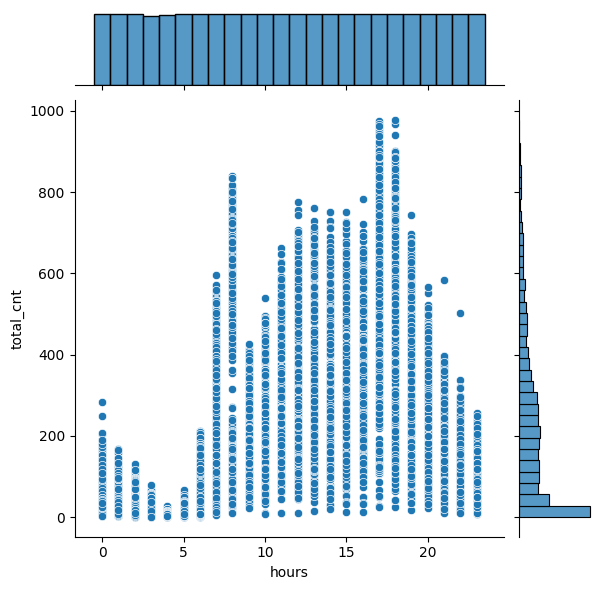

In [19]:
sns.jointplot(x='hours',y='total_cnt',data=df)

<Axes: xlabel='weekday', ylabel='total_cnt'>

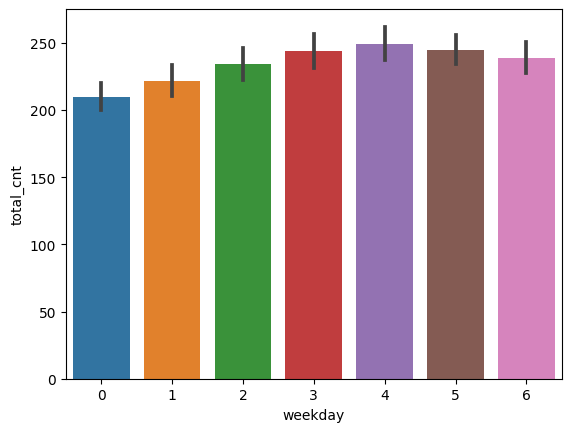

In [20]:
sns.barplot(x='weekday',y='total_cnt',data=df)

<Axes: xlabel='month', ylabel='total_cnt'>

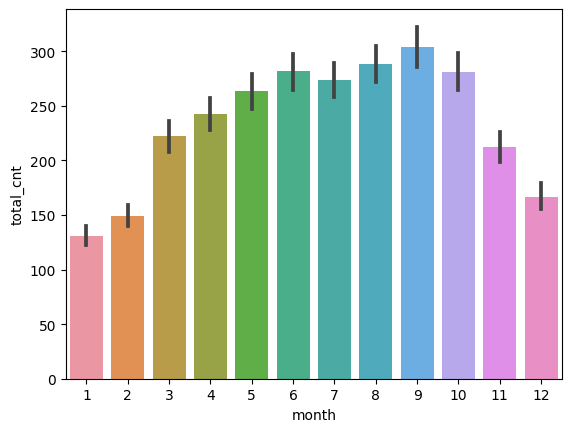

In [26]:
sns.barplot(x='month',y='total_cnt',data=df)

Text(0.5, 1.0, 'Hourly Bike Rental Counts by Weekday')

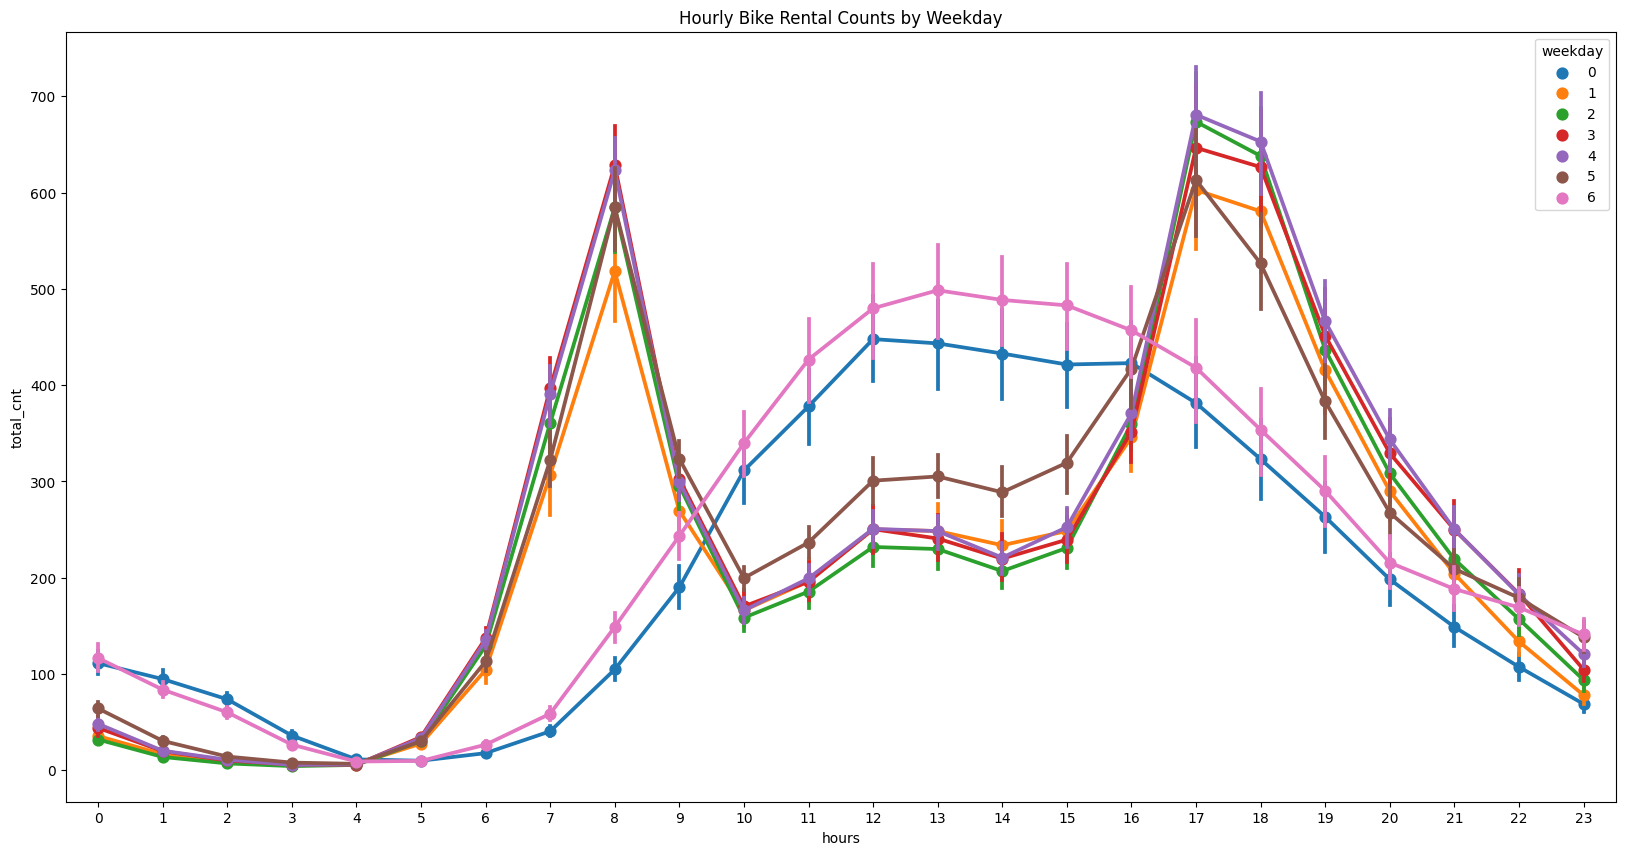

In [29]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hours',y='total_cnt',hue='weekday',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Weekday")

Text(0.5, 1.0, 'Hourly Bike Rental Counts by Weather Condition')

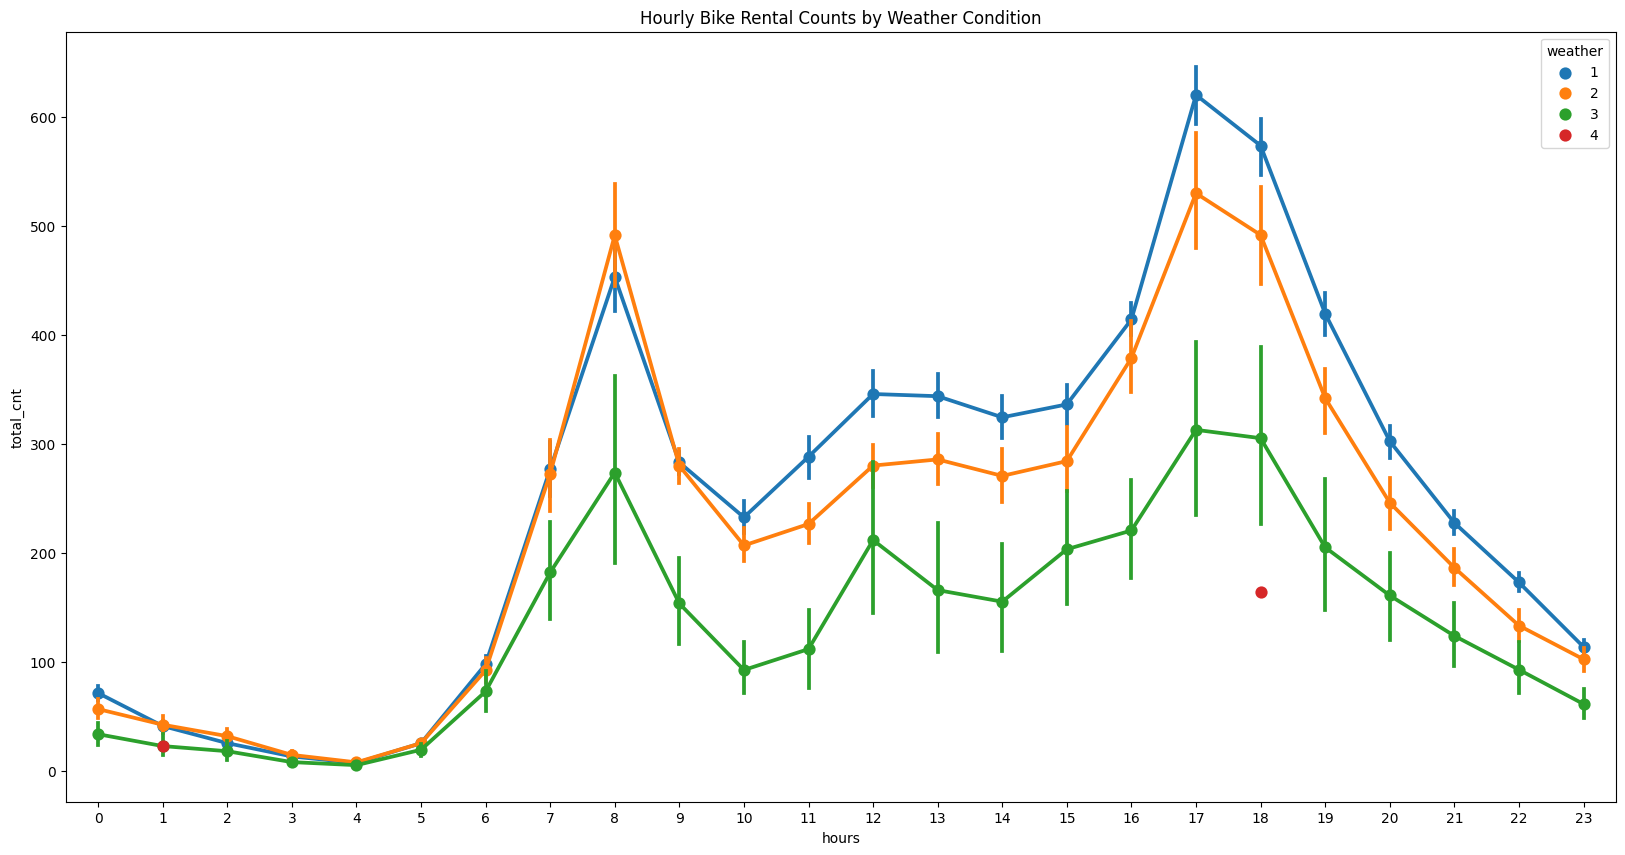

In [30]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hours',y='total_cnt',hue='weather',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Weather Condition")


Text(0.5, 1.0, 'Hourly Bike Rental Counts by Season')

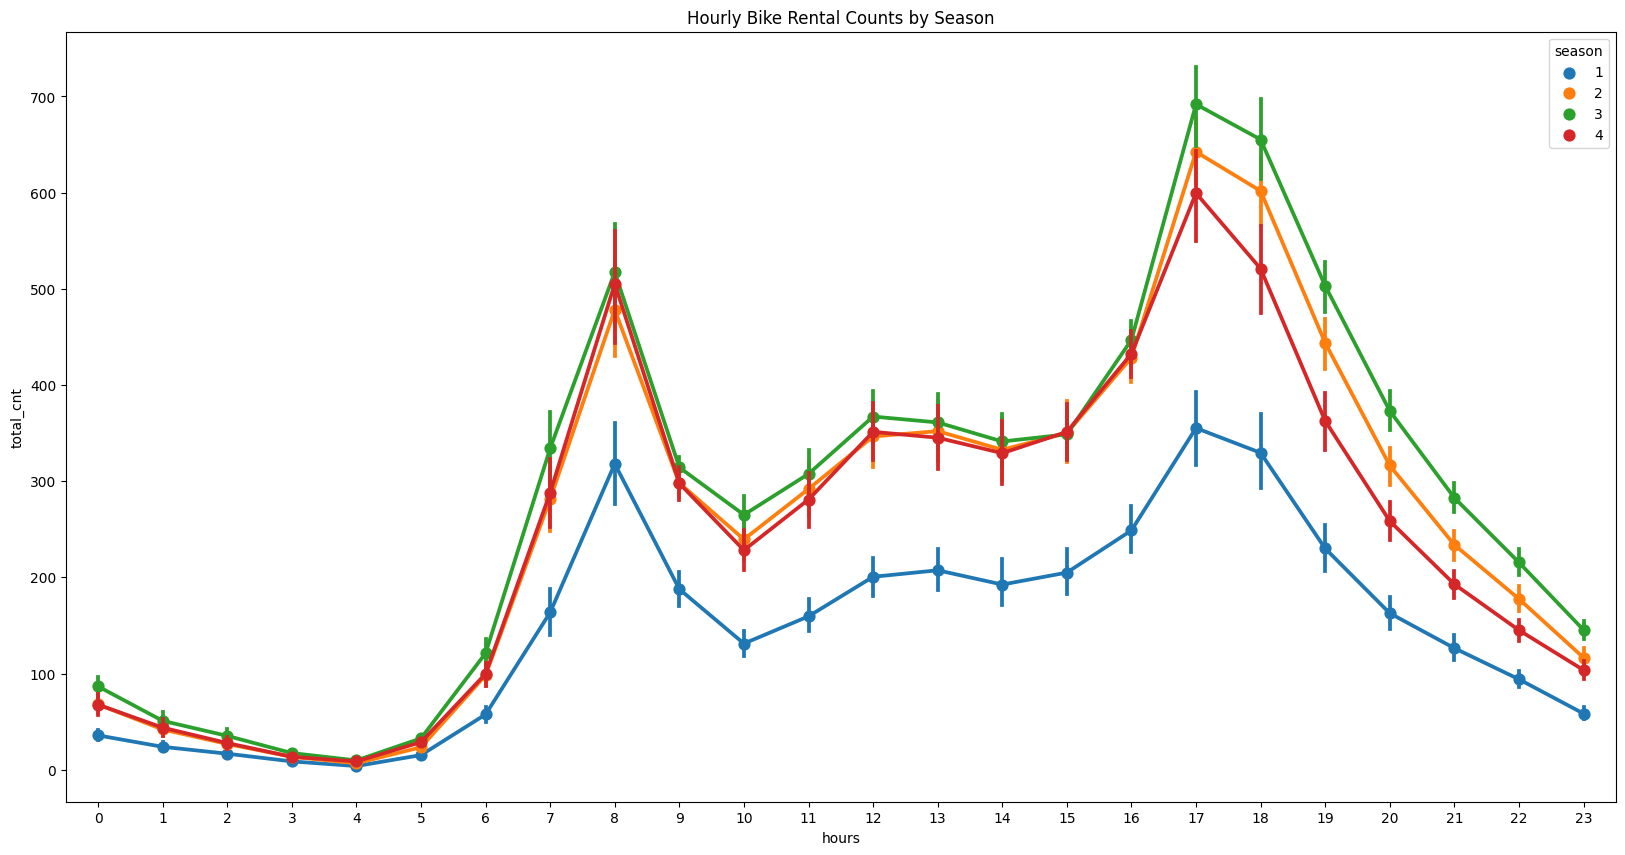

In [31]:
fig,ax=plt.subplots(figsize=(20,10))
sns.pointplot(data=df,x='hours',y='total_cnt',hue='season',ax=ax)
ax.set_title("Hourly Bike Rental Counts by Season")


<Axes: xlabel='weather', ylabel='count'>

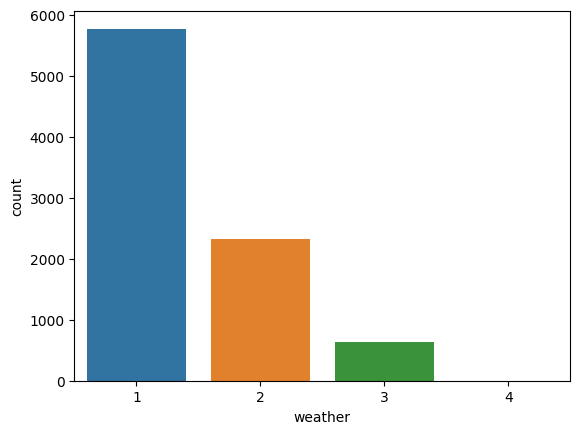

In [32]:
sns.countplot(x='weather',data=df)

<ipython-input-35-ff4034a22f6b>:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


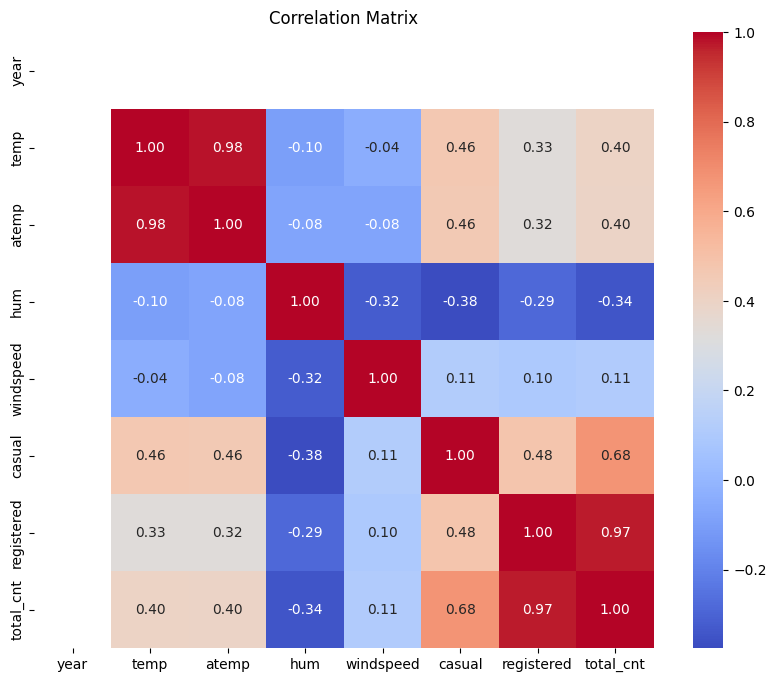

In [35]:
corr = df.corr()
plt.figure(figsize=(10, 8))
sns.heatmap(corr, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Matrix')
plt.show()

In [36]:
cols = ["season","month", "hours", "holiday", "weekday", "workingday", "weather"]

In [37]:
df=pd.get_dummies(df,columns=cols,drop_first=True)

In [38]:
df

,year,temp,atemp,hum,windspeed,casual,registered,total_cnt,season_2,season_3,...,weekday_1,weekday_2,weekday_3,weekday_4,weekday_5,weekday_6,workingday_1,weather_2,weather_3,weather_4
0,1,0.36,0.3788,0.66,0.0000,5,43,48,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0.36,0.3485,0.66,0.1343,15,78,93,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0.32,0.3485,0.76,0.0000,16,59,75,0,0,...,0,0,0,0,0,0,0,0,0,0
3,1,0.30,0.3333,0.81,0.0000,11,41,52,0,0,...,0,0,0,0,0,0,0,0,0,0
4,1,0.28,0.3030,0.81,0.0896,0,8,8,0,0,...,0,0,0,0,0,0,0,0,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8729,1,0.26,0.2576,0.60,0.1642,11,108,119,0,0,...,1,0,0,0,0,0,1,1,0,0
8730,1,0.26,0.2576,0.60,0.1642,8,81,89,0,0,...,1,0,0,0,0,0,1,1,0,0
8731,1,0.26,0.2576,0.60,0.1642,7,83,90,0,0,...,1,0,0,0,0,0,1,0,0,0
8732,1,0.26,0.2727,0.56,0.1343,13,48,61,0,0,...,1,0,0,0,0,0,1,0,0,0


MODELS

In [40]:
X=df.loc[:,df.columns!="total_cnt"]
Y=df["total_cnt"]

In [41]:
from sklearn.model_selection import train_test_split as tts
X_train,X_test,Y_train,Y_test=tts(X,Y,test_size=0.2,random_state=42)

In [42]:
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import RandomForestRegressor, GradientBoostingRegressor, ExtraTreesRegressor

models = [DecisionTreeRegressor(max_depth=7),
         RandomForestRegressor(),
         ExtraTreesRegressor(),
         GradientBoostingRegressor()]

In [43]:
from sklearn import model_selection
def train(model):
    kfold = model_selection.KFold(n_splits=5, random_state=42,shuffle=True)
    pred = model_selection.cross_val_score(model, X, Y, cv=kfold, scoring='neg_mean_squared_error')
    cv_score = pred.mean()
    print('Model:',model)
    print('CV score:', abs(cv_score))

In [44]:
for model in models:
    train(model)

Model: DecisionTreeRegressor(max_depth=7)
CV score: 196.0771676231961
Model: RandomForestRegressor()
CV score: 15.712530663333183
Model: ExtraTreesRegressor()
CV score: 11.942031548089968
Model: GradientBoostingRegressor()
CV score: 34.39247119818991


In [45]:
from sklearn import tree
Decision=tree.DecisionTreeRegressor(max_depth=7)
Decision.fit(X_train,Y_train)

DecisionTreeRegressor(max_depth=7)

In [46]:
y_test_pred=Decision.predict(X_test)

In [47]:
from sklearn.metrics import r2_score
r2_score(Y_test,y_test_pred)

0.995516246258339

In [48]:
from sklearn.tree import export_graphviz
import graphviz

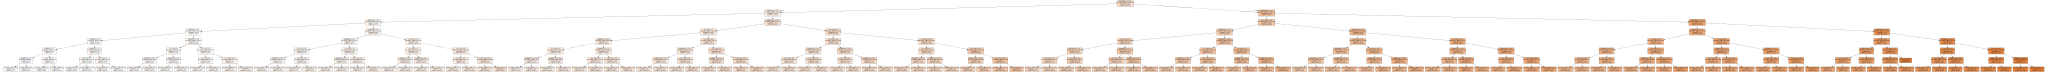

In [49]:
dot_data = export_graphviz(Decision, out_file=None, filled=True,feature_names=X_train.columns)
graph = graphviz.Source(dot_data)
graph